In [14]:
import requests
import pandas as pd
import time

base_url = "https://us-real-estate.p.rapidapi.com/sold-homes"
headers = {
    'X-RapidAPI-Key': "a0811a4da0msh43fcf320bfa5c58p1a245ajsn6a0baab3175a",  # Make sure to hide your API key in a secure manner
    'X-RapidAPI-Host': "us-real-estate.p.rapidapi.com"
}

params = {
    'state_code': 'GA',
    'city': 'Atlanta',
    'limit': '200',
    'sort': 'sold_date'
}

all_data = []

# Assuming you need about 600 requests to get 120,000 records
for offset in range(0, 120000, 200):
    params['offset'] = str(offset)
    response = requests.get(base_url, headers=headers, params=params)
    
    # Check if the response is successful
    if response.status_code == 200:
        raw_data = response.json()['data']['results']

        for property in raw_data:
            details = property['description']
            location = property['location']['address']

            # Safely get the coordinate dictionary
            coordinate = location.get('coordinate', {})

            tags = property.get('tags', [])
            if not isinstance(tags, list):
                tags = []

            county_name = location.get('address', {}).get('county', {}).get('name', None)

            # Safely extract longitude and latitude
            lon = coordinate.get('lon') if coordinate else None
            lat = coordinate.get('lat') if coordinate else None

            all_data.append({
                'Year Built': details.get('year_built'),
                'Square Footage': details.get('sqft'),
                'lot sqft':details.get('lot_sqft'),
                'Bedrooms': details.get('beds'),
                'Bathrooms': details.get('baths'),
                'Stories': details.get('stories'),
                'List Price': property.get('list_price'),
                'Sold Price': details.get('sold_price'),
                'List Date': property.get('list_date'),
                'Sold Date': details.get('sold_date'),
                'Postal Code': location.get('postal_code'),
                'City': location.get('city'),
                'Address': location.get('line'),
                'lon': lon,  # using the safely extracted value
                'lat': lat,  # using the safely extracted value
                'State': location.get('state_code'),
                'Property Type': details.get('type')
            })


    else:
        print(f"Failed to retrieve data for offset {offset}. Status code: {response.status_code}")
    
    # Introduce a delay (e.g., 2 seconds) to avoid hitting rate limits
    time.sleep(2)

# Convert the collected data to a DataFrame
df = pd.DataFrame(all_data)


In [15]:
ATL_RE_Data = df


In [11]:
ATL_RE_Data

,Year Built,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,List Price,Sold Price,List Date,Sold Date,Postal Code,City,lon,lat,State,Property Type,Tags,County
0,1983.0,1904.0,1917.0,3.0,3.0,2.0,485000.0,509000.0,2023-07-13T18:52:41Z,2023-08-23,30338,Atlanta,-84.348339,33.938835,GA,townhomes,"central_air, community_outdoor_space, den_or_o...",None
1,2021.0,1341.0,1525.0,2.0,3.0,3.0,459000.0,450000.0,2023-07-26T14:40:17Z,2023-08-23,30312,Atlanta,-84.362050,33.724363,GA,townhomes,"central_air, community_clubhouse, community_ou...",None
2,2008.0,2002.0,2004.0,3.0,3.0,1.0,999900.0,985000.0,2023-02-22T10:00:58Z,2023-08-23,30308,Atlanta,-84.383904,33.777800,GA,condos,"central_air, central_heat, city_view, communit...",None
3,2008.0,2920.0,741.0,3.0,3.0,2.0,258000.0,258000.0,2023-08-04T14:04:52Z,2023-08-22,30331,Atlanta,-84.515221,33.672826,GA,townhomes,"central_air, central_heat, family_room, laundr...",None
4,2005.0,5817.0,28440.0,7.0,4.0,2.0,775000.0,756000.0,2023-05-01T17:10:22Z,2023-08-22,30331,Atlanta,-84.557189,33.689483,GA,single_family,"central_air, central_heat, city_view, communit...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,1973.0,1594.0,784.0,2.0,3.0,2.0,315000.0,304700.0,2023-01-18T03:08:53Z,2023-02-27,30345,Atlanta,-84.253501,33.855641,GA,townhomes,"central_air, central_heat, community_outdoor_s...",None
5718,1940.0,NaN,4356.0,3.0,2.0,1.0,650000.0,650000.0,2023-01-27T17:24:11Z,2023-02-27,30317,Atlanta,-84.346198,33.751377,GA,single_family,"central_air, community_outdoor_space, communit...",None
5719,1964.0,7308.0,17424.0,NaN,0.0,2.0,NaN,560000.0,None,2023-02-27,30345,Atlanta,-84.289966,33.857761,GA,other,,None
5720,1968.0,1500.0,1498.0,2.0,2.0,1.0,364500.0,357000.0,2022-11-21T16:02:36Z,2023-02-27,30305,Atlanta,-84.388312,33.829551,GA,condos,"central_air, central_heat, community_outdoor_s...",None


In [16]:
import os

current_filepath = os.getcwd()
filename = "ATL_RE_Data.csv"
file_path = os.path.join(current_filepath, filename)

ATL_RE_Data.to_csv(file_path)

file_path

'/Users/ndubuisiazi/Desktop/House_Model/ATL_RE_Data.csv'

In [32]:
# Load the data
df_new = df

# Calculate IQR for 'Sold Price'
Q1 = df_new['Sold Price'].quantile(0.25)
Q3 = df_new['Sold Price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df_new[(df_new['Sold Price'] >= lower_bound) & (df_new['Sold Price'] <= upper_bound)]

df_no_outliers.describe()


,Year Built,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,List Price,Sold Price,lon,lat
count,4996.000000,4633.000000,5.029000e+03,4899.000000,5188.000000,4974.000000,4.653000e+03,5.265000e+03,5219.000000,5219.000000
mean,1976.066453,1760.098856,1.380375e+05,2.787304,2.228990,1.598914,4.360397e+05,4.278836e+05,-84.400343,33.778271
std,30.144490,1124.997442,5.937515e+06,1.137394,1.168638,0.715353,2.329357e+05,2.356529e+05,0.068763,0.078275
min,1879.000000,435.000000,4.400000e+01,0.000000,0.000000,1.000000,2.000000e+04,1.099900e+04,-84.644314,33.564848
25%,1953.000000,1122.000000,1.255000e+03,2.000000,1.000000,1.000000,2.690000e+05,2.600000e+05,-84.441523,33.729501
50%,1976.000000,1500.000000,6.273000e+03,3.000000,2.000000,1.000000,3.775000e+05,3.735000e+05,-84.385477,33.774156
75%,2005.000000,2152.000000,1.244900e+04,3.000000,3.000000,2.000000,5.690000e+05,5.650000e+05,-84.357309,33.828755
max,2021.000000,35560.000000,4.041497e+08,11.000000,7.000000,3.000000,1.795000e+06,1.195000e+06,-84.150630,34.103505


/Users/ndubuisiazi/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ndubuisiazi/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ndubuisiazi/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ndubuisiazi/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

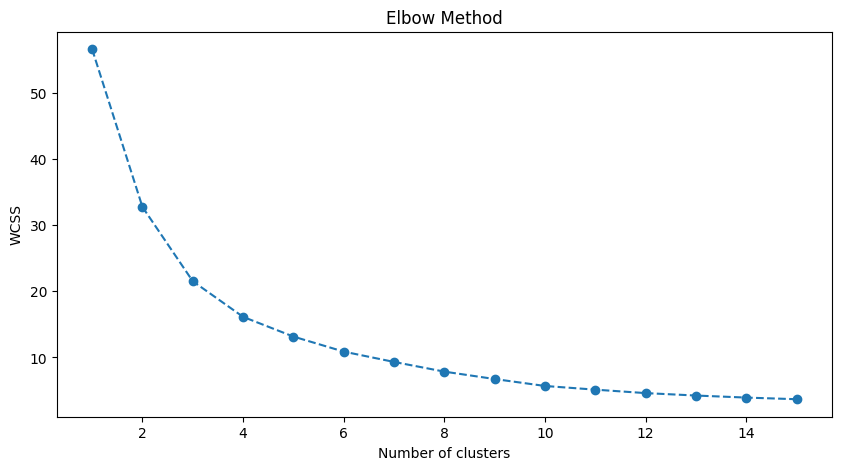

In [41]:
from sklearn.cluster import KMeans

# Extracting the 'lon' and 'lat' for clustering
X = df_cleaned[['lon', 'lat']]

# Using the Elbow method to find a good number of clusters using WCSS (Within-Cluster-Sum-of-Squares)
wcss = []

# Let's check for up to 15 clusters
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # Inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/Users/ndubuisiazi/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/rt/kgjc4sq946382dtnnq8n_10m0000gn/T/ipykernel_56442/1851822752.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned[['lon', 'lat']])


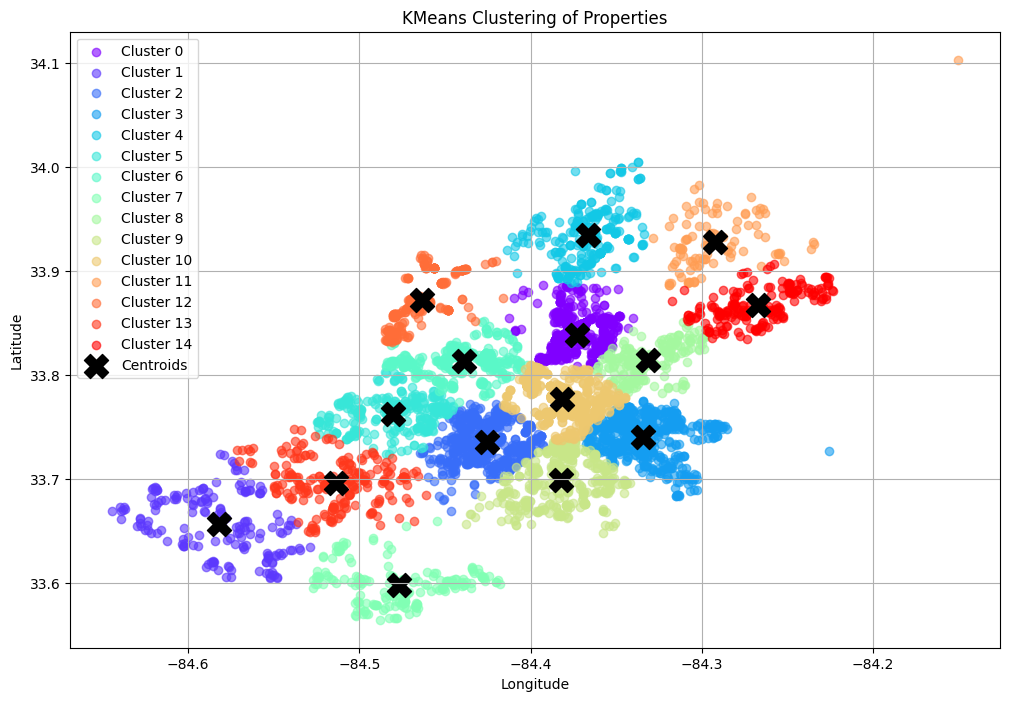

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Remove rows with missing longitude and latitude values
df_cleaned = df_no_outliers.dropna(subset=['lon', 'lat'])

# Step 1: KMeans Clustering
kmeans = KMeans(n_clusters=15, random_state=42)  # Changed number of clusters to 15
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned[['lon', 'lat']])

# Step 2: Visualization
plt.figure(figsize=(12, 8))

# Use a colormap to generate colors for the clusters
colors = plt.cm.rainbow(np.linspace(0, 1, 15))

for i in range(15):  # Loop for 15 clusters
    cluster_data = df_cleaned[df_cleaned['Cluster'] == i]
    plt.scatter(cluster_data['lon'], cluster_data['lat'], c=[colors[i]], label=f"Cluster {i}", alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('KMeans Clustering of Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Calculate descriptive statistics for the entire dataset
overall_stats = df_cleaned[['Sold Price', 'Square Footage', 'lot sqft', 'Year Built', 'Bedrooms', 'Bathrooms', 'Stories']].describe()

# Calculate descriptive statistics for each cluster
cluster_stats = df_cleaned.groupby('Cluster')[['Sold Price', 'Square Footage', 'lot sqft', 'Year Built', 'Bedrooms', 'Bathrooms', 'Stories']].describe()

# Display overall stats and stats for each cluster
overall_stats, [cluster_stats[col] for col in ['Sold Price', 'Square Footage', 'lot sqft', 'Year Built', 'Bedrooms', 'Bathrooms', 'Stories']]


(         Sold Price  Square Footage      lot sqft   Year Built     Bedrooms  \
 count  5.219000e+03     4617.000000  4.990000e+03  4979.000000  4882.000000   
 mean   4.290733e+05     1760.283517  1.383008e+05  1975.974694     2.787792   
 std    2.353280e+05     1126.433781  5.960658e+06    30.120459     1.138274   
 min    1.099900e+04      435.000000  4.400000e+01  1879.000000     0.000000   
 25%    2.600000e+05     1121.000000  1.250000e+03  1953.000000     2.000000   
 50%    3.740000e+05     1500.000000  6.250000e+03  1976.000000     3.000000   
 75%    5.679875e+05     2152.000000  1.228400e+04  2005.000000     3.000000   
 max    1.195000e+06    35560.000000  4.041497e+08  2021.000000    11.000000   
 
          Bathrooms      Stories  
 count  5142.000000  4957.000000  
 mean      2.239401     1.596530  
 std       1.159880     0.714355  
 min       0.000000     1.000000  
 25%       1.000000     1.000000  
 50%       2.000000     1.000000  
 75%       3.000000     2.000000 

In [36]:
# Calculate statistics
min_price = df_no_outliers['Sold Price'].min()
max_price = df_no_outliers['Sold Price'].max()
median_price = df_no_outliers['Sold Price'].median()

median_SqFt = df_no_outliers['Square Footage'].median()
median_bedrooms = df_no_outliers['Bedrooms'].median()
mode_bedrooms = df_no_outliers['Bedrooms'].mode()[0]

print("Median number of bedrooms:", median_bedrooms)
print("Most common number of bedrooms (mode):", mode_bedrooms)
print(f"median_SqFt: {median_SqFt:,.2f}")
print(f"Minimum Sold Price: ${min_price:,.2f}")
print(f"Maximum Sold Price: ${max_price:,.2f}")
print(f"Median Sold Price: ${median_price:,.2f}")

Median number of bedrooms: 3.0
Most common number of bedrooms (mode): 3.0
median_SqFt: 1,500.00
Minimum Sold Price: $10,999.00
Maximum Sold Price: $1,195,000.00
Median Sold Price: $373,500.00


In [31]:
# Sorting the dataframe by 'Sold Price' in descending order and selecting the top 50 rows
top_50_expensive = df_cleaned.sort_values(by='Sold Price', ascending=False).head(50)
top_50_expensive


,Year Built,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,List Price,Sold Price,List Date,Sold Date,Postal Code,City,lon,lat,State,Property Type,Tags,County,Cluster
3736,2004.0,327144.0,145229.0,1.0,1.0,NaN,NaN,6.727700e+10,None,2023-04-24,30363,Atlanta,-84.402376,33.790594,GA,other,,None,2
3711,2004.0,157039.0,465221.0,10.0,2.0,NaN,NaN,1.790000e+07,None,2023-04-24,30315,Atlanta,-84.373560,33.706726,GA,other,,None,0
1750,1912.0,33000.0,89298.0,9.0,18.0,3.0,8995000.0,8.500000e+06,2022-09-30T19:55:05Z,2023-06-26,30305,Atlanta,-84.402642,33.844784,GA,single_family,"central_air, community_outdoor_space, communit...",None,2
1661,1970.0,102118.0,379843.0,NaN,0.0,NaN,NaN,8.400000e+06,None,2023-06-28,30311,Atlanta,-84.498720,33.696061,GA,other,,None,1
2957,1996.0,NaN,225510.0,8.0,9.0,3.0,7995000.0,7.595000e+06,2023-03-22T19:09:31Z,2023-05-17,30342,Atlanta,-84.386939,33.854360,GA,single_family,"central_air, central_heat, community_outdoor_s...",None,3
542,2020.0,12041.0,65471.0,7.0,10.0,3.0,6795000.0,7.000000e+06,2023-06-21T16:35:34Z,2023-08-01,30342,Atlanta,-84.398033,33.870477,GA,single_family,"central_air, community_outdoor_space, communit...",None,3
4206,2006.0,2683.0,6098.0,4.0,2.0,2.0,NaN,6.901000e+06,None,2023-04-10,30344,East Point,-84.444526,33.702327,GA,single_family,,None,0
2045,1932.0,9286.0,207781.0,5.0,6.0,3.0,7490000.0,6.772500e+06,2023-02-19T22:10:59Z,2023-06-15,30305,Atlanta,-84.398460,33.834154,GA,single_family,"central_air, community_outdoor_space, communit...",None,2
1231,1939.0,11000.0,116741.0,8.0,12.0,3.0,6695000.0,6.250000e+06,2023-03-02T16:10:10Z,2023-07-10,30342,Atlanta,-84.393477,33.859916,GA,single_family,"central_air, city_view, community_outdoor_spac...",None,3
3862,2014.0,6042.0,76125.0,6.0,6.0,2.0,NaN,6.200000e+06,None,2023-04-20,30305,Atlanta,-84.399250,33.836613,GA,single_family,,None,2


In [1278]:
# Convert 'Sold Date' to datetime format
ATL_RE_Data['Sold Date'] = pd.to_datetime(ATL_RE_Data['Sold Date'])

# Extract the year from the 'Sold Date' column
ATL_RE_Data['Sold Year'] = ATL_RE_Data['Sold Date'].dt.year

# Calculate the age of the house
ATL_RE_Data['House Age'] = ATL_RE_Data['Sold Year'] - ATL_RE_Data['Year Built']



In [1279]:
# Step 1: Calculate the correlation matrix
corr_matrix = ATL_RE_Data.corr()

# Step 2: Filter out the upper triangle of the matrix
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_triangle_corr = corr_matrix.where(upper_triangle)

# Step 3: Find pairs with correlation coefficient above a threshold (e.g., 0.8)
to_drop = [column for column in upper_triangle_corr.columns if any(upper_triangle_corr[column].abs() > 0.8)]

# List of pairs of highly correlated features
highly_correlated_pairs = {}
for column in to_drop:
    # Find the correlated features
    correlated_features = upper_triangle_corr.index[upper_triangle_corr[column].abs() > 0.8].tolist()
    if correlated_features:
        highly_correlated_pairs[column] = correlated_features

highly_correlated_pairs


/var/folders/rt/kgjc4sq946382dtnnq8n_10m0000gn/T/ipykernel_56396/2443604635.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ATL_RE_Data.corr()


{'Bathrooms': ['Square Footage'],
 'List Price': ['Square Footage'],
 'Sold Price': ['List Price'],
 'House Age': ['Year Built']}

In [1280]:
correlation_with_target = ATL_RE_Data.corr()['Sold Price'].sort_values(ascending=False)
print(correlation_with_target)


Sold Price        1.000000
List Price        0.995738
Square Footage    0.798284
Bathrooms         0.723126
Bedrooms          0.533158
Stories           0.446967
Year Built        0.132364
lot sqft         -0.002168
House Age        -0.132364
Sold Year              NaN
Name: Sold Price, dtype: float64


/var/folders/rt/kgjc4sq946382dtnnq8n_10m0000gn/T/ipykernel_56396/3947843769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = ATL_RE_Data.corr()['Sold Price'].sort_values(ascending=False)


In [1281]:

to_remove=['List Price','List Date','List Price','Sold Year', 'Year Built','City','State','Property Type','Tags','County']
ATL_RE_Data.drop(to_remove,axis=1, inplace=True)

In [1282]:
ATL_RE_Data

,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,Sold Price,Sold Date,Postal Code,House Age
0,1396.0,12807.0,4.0,2.0,1.0,140000.0,2023-08-11,30315,61.0
1,1000.0,21780.0,3.0,1.0,1.0,195000.0,2023-08-11,30331,65.0
2,1686.0,21432.0,3.0,2.0,1.0,182900.0,2023-08-11,30331,67.0
4,1572.0,17424.0,3.0,2.0,1.0,428000.0,2023-08-10,30340,62.0
5,4200.0,44976.0,4.0,4.0,3.0,1430000.0,2023-08-10,30327,57.0
...,...,...,...,...,...,...,...,...,...
5713,4769.0,81414.0,5.0,5.0,3.0,2425000.0,2023-02-13,30327,4.0
5718,954.0,7501.0,3.0,1.0,1.0,235000.0,2023-02-13,30318,68.0
5721,1809.0,6534.0,3.0,3.0,2.0,440000.0,2023-02-13,30318,15.0
5724,3439.0,8712.0,5.0,4.0,2.0,700200.0,2023-02-13,30345,36.0


In [1283]:
# Use pandas get_dummies to one-hot encode the 'Postal Code' column again
postal_code_dummies = pd.get_dummies(ATL_RE_Data['Postal Code'], prefix='PostalCode')

# Drop the original 'Postal Code' column and concatenate the one-hot encoded columns
ATL_RE_Data_encoded = pd.concat([ATL_RE_Data.drop('Postal Code', axis=1), postal_code_dummies], axis=1)

# Display the first few rows of the transformed dataframe
ATL_RE_Data_encoded.head()


,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,Sold Price,Sold Date,House Age,PostalCode_30024,PostalCode_30033,...,PostalCode_30339,PostalCode_30340,PostalCode_30341,PostalCode_30342,PostalCode_30344,PostalCode_30345,PostalCode_30349,PostalCode_30350,PostalCode_30354,PostalCode_30360
0,1396.0,12807.0,4.0,2.0,1.0,140000.0,2023-08-11,61.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000.0,21780.0,3.0,1.0,1.0,195000.0,2023-08-11,65.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1686.0,21432.0,3.0,2.0,1.0,182900.0,2023-08-11,67.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1572.0,17424.0,3.0,2.0,1.0,428000.0,2023-08-10,62.0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,4200.0,44976.0,4.0,4.0,3.0,1430000.0,2023-08-10,57.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1284]:
correlation_with_target = ATL_RE_Data.corr()['Sold Price'].sort_values(ascending=False)
print(correlation_with_target)

Sold Price        1.000000
Square Footage    0.798284
Bathrooms         0.723126
Bedrooms          0.533158
Stories           0.446967
lot sqft         -0.002168
House Age        -0.132364
Name: Sold Price, dtype: float64


/var/folders/rt/kgjc4sq946382dtnnq8n_10m0000gn/T/ipykernel_56396/974496863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = ATL_RE_Data.corr()['Sold Price'].sort_values(ascending=False)


In [1288]:
ATL_RE_Data = ATL_RE_Data.dropna()

In [1289]:
ATL_RE_Data

,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,Sold Price,Sold Date,Postal Code,House Age
0,1396.0,12807.0,4.0,2.0,1.0,140000.0,2023-08-11,30315,61.0
1,1000.0,21780.0,3.0,1.0,1.0,195000.0,2023-08-11,30331,65.0
2,1686.0,21432.0,3.0,2.0,1.0,182900.0,2023-08-11,30331,67.0
4,1572.0,17424.0,3.0,2.0,1.0,428000.0,2023-08-10,30340,62.0
5,4200.0,44976.0,4.0,4.0,3.0,1430000.0,2023-08-10,30327,57.0
...,...,...,...,...,...,...,...,...,...
5713,4769.0,81414.0,5.0,5.0,3.0,2425000.0,2023-02-13,30327,4.0
5718,954.0,7501.0,3.0,1.0,1.0,235000.0,2023-02-13,30318,68.0
5721,1809.0,6534.0,3.0,3.0,2.0,440000.0,2023-02-13,30318,15.0
5724,3439.0,8712.0,5.0,4.0,2.0,700200.0,2023-02-13,30345,36.0


In [1082]:

ATL_RE_Data_SF = pd.get_dummies(df, columns=['Postal Code'], prefix='PostalCode', drop_first=True)


In [1083]:
ATL_RE_Data_SF

,Year Built,Square Footage,Bedrooms,Bathrooms,Stories,List Price,Sold Price,List Date,Sold Date,City,...,PostalCode_30339,PostalCode_30340,PostalCode_30341,PostalCode_30342,PostalCode_30344,PostalCode_30345,PostalCode_30349,PostalCode_30350,PostalCode_30354,PostalCode_30360
0,1930.0,1100.0,3.0,1.0,1.0,175000.0,140000.0,2023-05-01 11:44:55,2023-08-09,Atlanta,...,0,0,0,0,0,0,0,0,0,0
1,1969.0,1850.0,3.0,1.0,2.0,134000.0,134000.0,2023-03-13 20:30:30,2023-08-09,Atlanta,...,0,0,0,0,0,0,0,0,0,0
4,1953.0,2514.0,3.0,2.0,2.0,600000.0,600000.0,2023-07-06 04:54:02,2023-08-08,Atlanta,...,0,0,0,0,0,0,0,0,0,0
5,1935.0,1452.0,3.0,1.0,1.0,700000.0,725000.0,2023-07-20 18:06:42,2023-08-08,Atlanta,...,0,0,0,0,0,0,0,0,0,0
6,2002.0,5830.0,5.0,7.0,2.0,2095000.0,1887000.0,2023-05-31 03:33:03,2023-08-08,Atlanta,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,1955.0,954.0,3.0,1.0,1.0,235000.0,235000.0,2023-01-23 15:55:05,2023-02-13,Atlanta,...,0,0,0,0,0,0,0,0,0,0
5682,2008.0,1809.0,3.0,3.0,2.0,449900.0,440000.0,2022-07-01 04:43:32,2023-02-13,Atlanta,...,0,0,0,0,0,0,0,0,0,0
5685,1987.0,3439.0,5.0,4.0,2.0,689000.0,700200.0,2023-01-24 18:19:49,2023-02-13,Atlanta,...,0,0,0,0,0,1,0,0,0,0
5687,1958.0,875.0,3.0,1.0,1.0,135000.0,135000.0,2023-01-30 22:52:31,2023-02-13,Atlanta,...,0,0,0,0,0,0,0,0,0,0


In [1084]:
ATL_RE_Data_SF['Sold Date'] = pd.to_datetime(ATL_RE_Data_SF['Sold Date'])  # Ensure 'Sold Date' is in datetime format
ATL_RE_Data_SF.set_index('Sold Date', inplace=True)
ATL_RE_Data_SF.sort_index(ascending=False, inplace=True)
ATL_RE_Data_SF

,Year Built,Square Footage,Bedrooms,Bathrooms,Stories,List Price,Sold Price,List Date,City,State,...,PostalCode_30339,PostalCode_30340,PostalCode_30341,PostalCode_30342,PostalCode_30344,PostalCode_30345,PostalCode_30349,PostalCode_30350,PostalCode_30354,PostalCode_30360
Sold Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,1930.0,1100.0,3.0,1.0,1.0,175000.0,140000.0,2023-05-01 11:44:55,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-09,1969.0,1850.0,3.0,1.0,2.0,134000.0,134000.0,2023-03-13 20:30:30,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,1953.0,2514.0,3.0,2.0,2.0,600000.0,600000.0,2023-07-06 04:54:02,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,1935.0,1452.0,3.0,1.0,1.0,700000.0,725000.0,2023-07-20 18:06:42,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,2002.0,5830.0,5.0,7.0,2.0,2095000.0,1887000.0,2023-05-31 03:33:03,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,1955.0,954.0,3.0,1.0,1.0,235000.0,235000.0,2023-01-23 15:55:05,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-02-13,2008.0,1809.0,3.0,3.0,2.0,449900.0,440000.0,2022-07-01 04:43:32,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-02-13,1987.0,3439.0,5.0,4.0,2.0,689000.0,700200.0,2023-01-24 18:19:49,Atlanta,GA,...,0,0,0,0,0,1,0,0,0,0


In [1085]:
ATL_RE_Data_SF['List vs Sold Price'] = ATL_RE_Data_SF['Sold Price']- ATL_RE_Data_SF['List Price']

ATL_RE_Data_SF

,Year Built,Square Footage,Bedrooms,Bathrooms,Stories,List Price,Sold Price,List Date,City,State,...,PostalCode_30340,PostalCode_30341,PostalCode_30342,PostalCode_30344,PostalCode_30345,PostalCode_30349,PostalCode_30350,PostalCode_30354,PostalCode_30360,List vs Sold Price
Sold Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,1930.0,1100.0,3.0,1.0,1.0,175000.0,140000.0,2023-05-01 11:44:55,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,-35000.0
2023-08-09,1969.0,1850.0,3.0,1.0,2.0,134000.0,134000.0,2023-03-13 20:30:30,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0.0
2023-08-08,1953.0,2514.0,3.0,2.0,2.0,600000.0,600000.0,2023-07-06 04:54:02,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0.0
2023-08-08,1935.0,1452.0,3.0,1.0,1.0,700000.0,725000.0,2023-07-20 18:06:42,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,25000.0
2023-08-08,2002.0,5830.0,5.0,7.0,2.0,2095000.0,1887000.0,2023-05-31 03:33:03,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,-208000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,1955.0,954.0,3.0,1.0,1.0,235000.0,235000.0,2023-01-23 15:55:05,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0.0
2023-02-13,2008.0,1809.0,3.0,3.0,2.0,449900.0,440000.0,2022-07-01 04:43:32,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,-9900.0
2023-02-13,1987.0,3439.0,5.0,4.0,2.0,689000.0,700200.0,2023-01-24 18:19:49,Atlanta,GA,...,0,0,0,0,1,0,0,0,0,11200.0


In [1086]:
ATL_RE_Data_SF.columns

Index(['Year Built', 'Square Footage', 'Bedrooms', 'Bathrooms', 'Stories',
       'List Price', 'Sold Price', 'List Date', 'City', 'State',
       'Property Type', 'Tags', 'County', 'Days on Market', 'PostalCode_30033',
       'PostalCode_30035', 'PostalCode_30305', 'PostalCode_30306',
       'PostalCode_30307', 'PostalCode_30308', 'PostalCode_30309',
       'PostalCode_30310', 'PostalCode_30311', 'PostalCode_30312',
       'PostalCode_30314', 'PostalCode_30315', 'PostalCode_30316',
       'PostalCode_30317', 'PostalCode_30318', 'PostalCode_30319',
       'PostalCode_30324', 'PostalCode_30326', 'PostalCode_30327',
       'PostalCode_30328', 'PostalCode_30329', 'PostalCode_30331',
       'PostalCode_30336', 'PostalCode_30337', 'PostalCode_30338',
       'PostalCode_30339', 'PostalCode_30340', 'PostalCode_30341',
       'PostalCode_30342', 'PostalCode_30344', 'PostalCode_30345',
       'PostalCode_30349', 'PostalCode_30350', 'PostalCode_30354',
       'PostalCode_30360', 'List vs Sold Pr

In [1087]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 1: Split the 'Tags' column into a list of tags
ATL_RE_Data_SF['Tags'] = ATL_RE_Data_SF['Tags'].str.split(', ')

# Step 2: Use MultiLabelBinarizer to get one hot encoding
mlb = MultiLabelBinarizer()
tags_encoded = mlb.fit_transform(ATL_RE_Data_SF['Tags'])
tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_, index=ATL_RE_Data_SF.index)

# Concatenate the one hot encoded tags to the original dataframe and drop the original 'Tags' column
ATL_RE_Data_SF = pd.concat([ATL_RE_Data_SF.drop('Tags', axis=1), tags_df], axis=1)



In [1088]:
ATL_RE_Data_SF

,Year Built,Square Footage,Bedrooms,Bathrooms,Stories,List Price,Sold Price,List Date,City,State,...,views,volleyball,washer_dryer,water_view,waterfront,well_water,white_kitchen,wine_cellar,wooded_land,wrap_around_porch
Sold Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,1930.0,1100.0,3.0,1.0,1.0,175000.0,140000.0,2023-05-01 11:44:55,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-09,1969.0,1850.0,3.0,1.0,2.0,134000.0,134000.0,2023-03-13 20:30:30,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,1953.0,2514.0,3.0,2.0,2.0,600000.0,600000.0,2023-07-06 04:54:02,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,1935.0,1452.0,3.0,1.0,1.0,700000.0,725000.0,2023-07-20 18:06:42,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,2002.0,5830.0,5.0,7.0,2.0,2095000.0,1887000.0,2023-05-31 03:33:03,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,1955.0,954.0,3.0,1.0,1.0,235000.0,235000.0,2023-01-23 15:55:05,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-02-13,2008.0,1809.0,3.0,3.0,2.0,449900.0,440000.0,2022-07-01 04:43:32,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0
2023-02-13,1987.0,3439.0,5.0,4.0,2.0,689000.0,700200.0,2023-01-24 18:19:49,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,0


In [1095]:
ATL_RE_Data_SF.columns


Index(['Square Footage', 'Bedrooms', 'Bathrooms', 'Stories', 'List Price',
       'Sold Price', 'Property Type', 'County', 'Days on Market',
       'PostalCode_30033',
       ...
       'views', 'volleyball', 'washer_dryer', 'water_view', 'waterfront',
       'well_water', 'white_kitchen', 'wine_cellar', 'wooded_land',
       'wrap_around_porch'],
      dtype='object', length=192)

In [1051]:
# Extract the year from the 'Sold Date' index
ATL_RE_Data_SF['Sold Year'] = ATL_RE_Data_SF.index.year

# Calculate the age of the house
ATL_RE_Data_SF['House Age'] = ATL_RE_Data_SF['Sold Year'] - ATL_RE_Data_SF['Year Built']

# Optionally, you can drop the 'Sold Year' column if you don't need it anymore
ATL_RE_Data_SF.drop('Sold Year', axis=1, inplace=True)

ATL_RE_Data_SF

,Year Built,Square Footage,Bedrooms,Bathrooms,Stories,List Price,Sold Price,List Date,City,State,...,volleyball,washer_dryer,water_view,waterfront,well_water,white_kitchen,wine_cellar,wooded_land,wrap_around_porch,House Age
Sold Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,1930.0,1100.0,3.0,1.0,1.0,175000.0,140000.0,2023-05-01 11:44:55,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,93.0
2023-08-09,1969.0,1850.0,3.0,1.0,2.0,134000.0,134000.0,2023-03-13 20:30:30,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,54.0
2023-08-08,1953.0,2514.0,3.0,2.0,2.0,600000.0,600000.0,2023-07-06 04:54:02,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,70.0
2023-08-08,1935.0,1452.0,3.0,1.0,1.0,700000.0,725000.0,2023-07-20 18:06:42,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,88.0
2023-08-08,2002.0,5830.0,5.0,7.0,2.0,2095000.0,1887000.0,2023-05-31 03:33:03,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,1955.0,954.0,3.0,1.0,1.0,235000.0,235000.0,2023-01-23 15:55:05,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,68.0
2023-02-13,2008.0,1809.0,3.0,3.0,2.0,449900.0,440000.0,2022-07-01 04:43:32,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,15.0
2023-02-13,1987.0,3439.0,5.0,4.0,2.0,689000.0,700200.0,2023-01-24 18:19:49,Atlanta,GA,...,0,0,0,0,0,0,0,0,0,36.0


In [1090]:
ATL_RE_Data_SF = ATL_RE_Data_SF.drop(columns=['State', 'City', 'List Date','Year Built'])


In [1091]:
ATL_RE_Data_SF

,Square Footage,Bedrooms,Bathrooms,Stories,List Price,Sold Price,Property Type,County,Days on Market,PostalCode_30033,...,views,volleyball,washer_dryer,water_view,waterfront,well_water,white_kitchen,wine_cellar,wooded_land,wrap_around_porch
Sold Date,,,,,,,,,,,,,,,,,,,,,
2023-08-09,1100.0,3.0,1.0,1.0,175000.0,140000.0,single_family,Fulton,99.0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-09,1850.0,3.0,1.0,2.0,134000.0,134000.0,single_family,Fulton,148.0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,2514.0,3.0,2.0,2.0,600000.0,600000.0,single_family,DeKalb,32.0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,1452.0,3.0,1.0,1.0,700000.0,725000.0,single_family,DeKalb,18.0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-08,5830.0,5.0,7.0,2.0,2095000.0,1887000.0,single_family,Fulton,68.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,954.0,3.0,1.0,1.0,235000.0,235000.0,single_family,Fulton,20.0,0,...,0,0,0,0,0,0,0,0,0,0
2023-02-13,1809.0,3.0,3.0,2.0,449900.0,440000.0,single_family,Fulton,226.0,0,...,0,0,0,0,0,0,0,0,0,0
2023-02-13,3439.0,5.0,4.0,2.0,689000.0,700200.0,single_family,DeKalb,19.0,0,...,0,0,0,0,0,0,0,0,0,0


In [1099]:
import os

current_filepath = os.getcwd()
filename = "ATL_RE_Data_SF.csv"
file_path = os.path.join(current_filepath, filename)

ATL_RE_Data_SF.to_csv(file_path)

file_path



'/Users/ndubuisiazi/Desktop/House_Model/ATL_RE_Data_SF.csv'

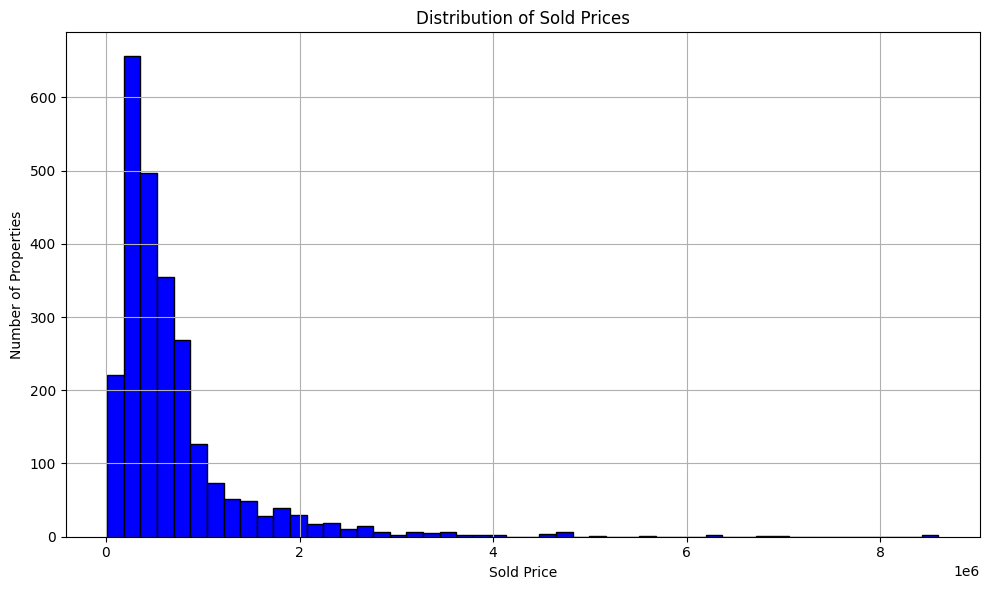

In [1290]:

import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ATL_RE_Data['Sold Price'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sold Prices')
plt.xlabel('Sold Price')
plt.ylabel('Number of Properties')
plt.grid(True)
plt.tight_layout()
plt.show()



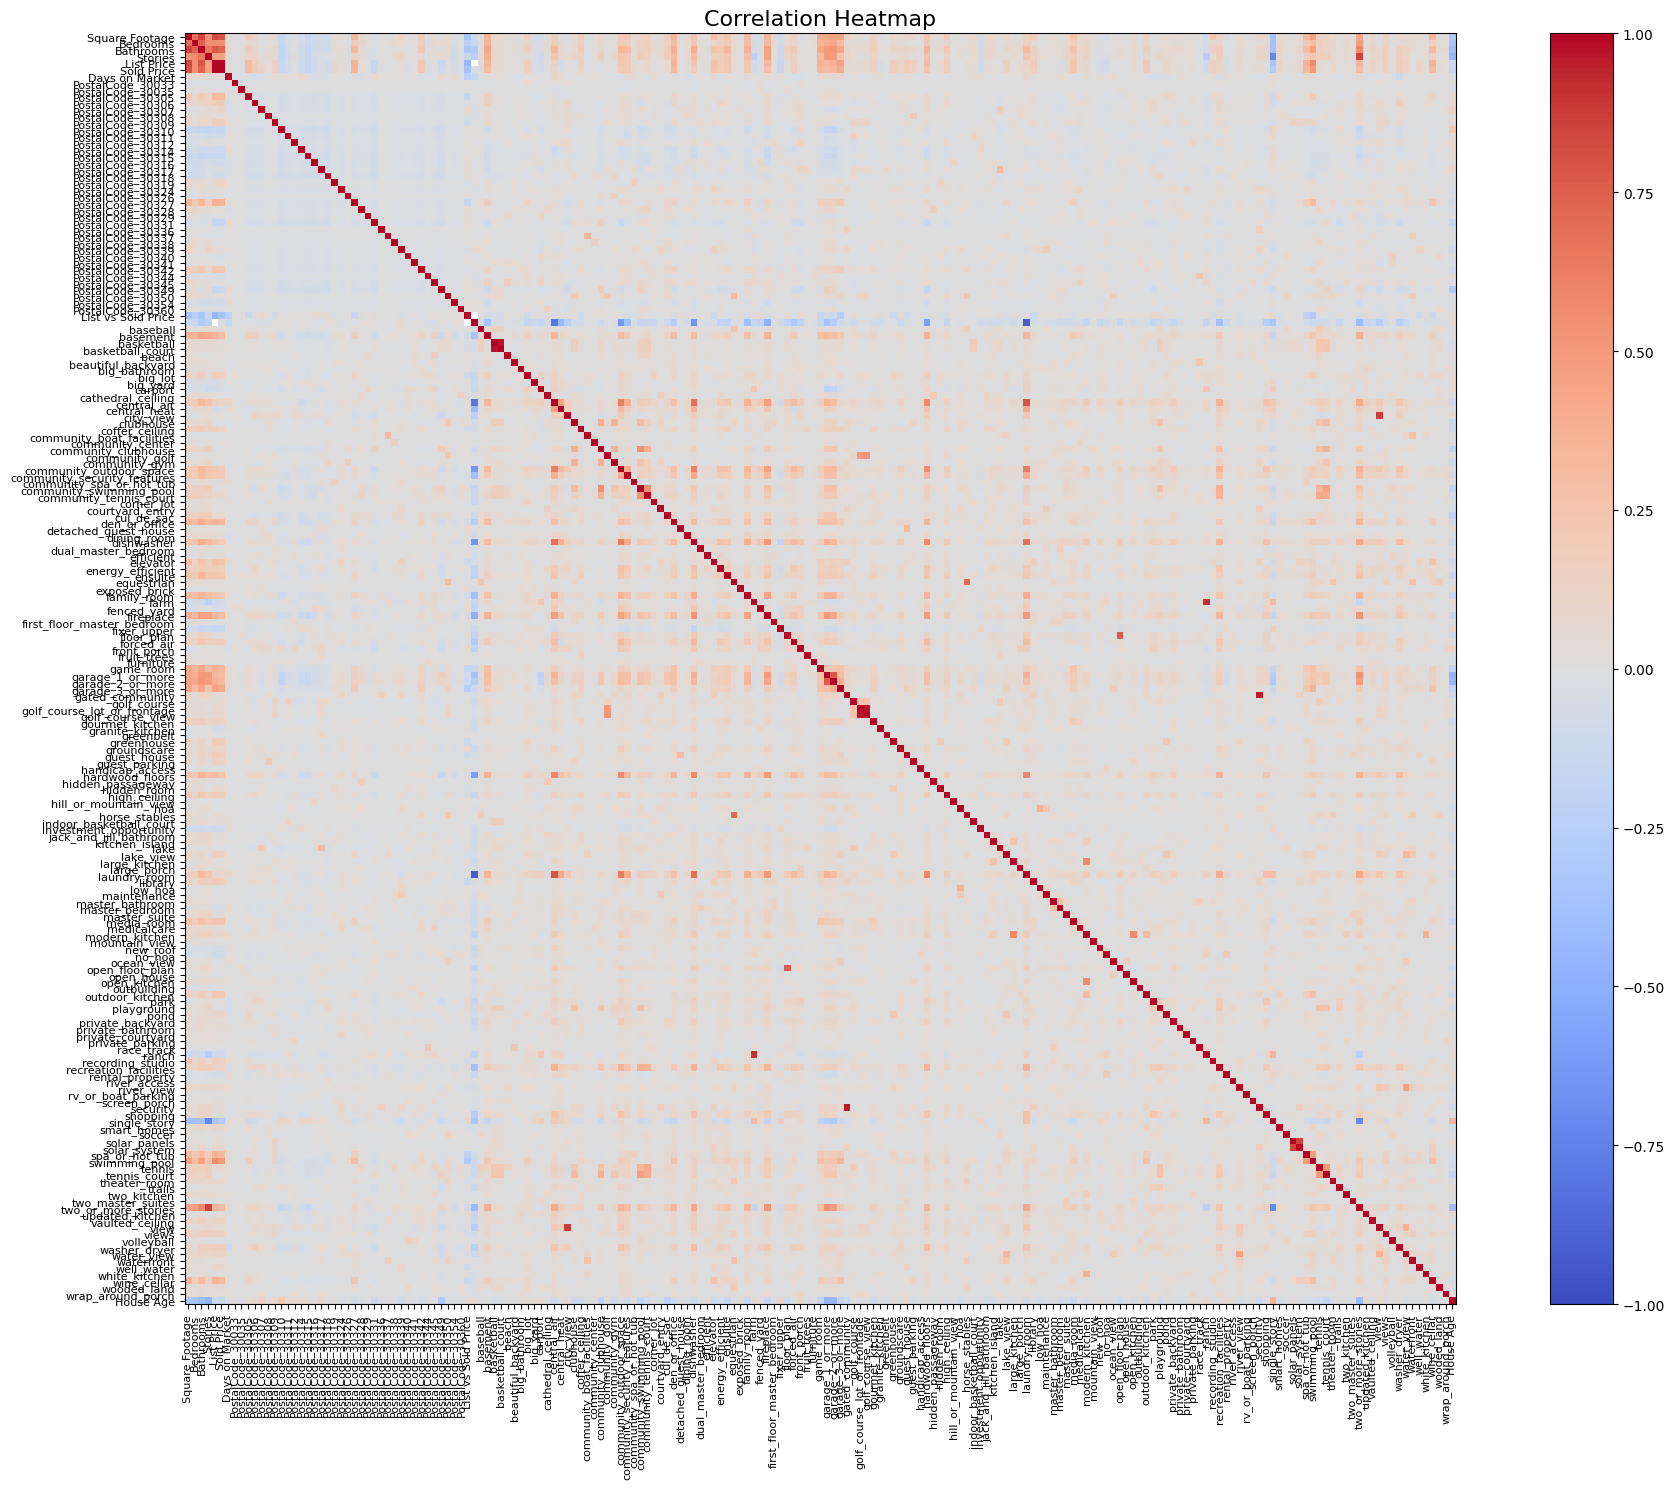

In [ ]:
# Increase the figure size
plt.figure(figsize=(20, 15))

# Plot the heatmap using matplotlib
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Heatmap', fontsize=16)

# Modify axes
ticks = np.arange(0, len(corr_matrix.columns), 1)
plt.xticks(ticks, corr_matrix.columns, rotation=90, fontsize=8)
plt.yticks(ticks, corr_matrix.columns, fontsize=8)

plt.tight_layout()
plt.show()



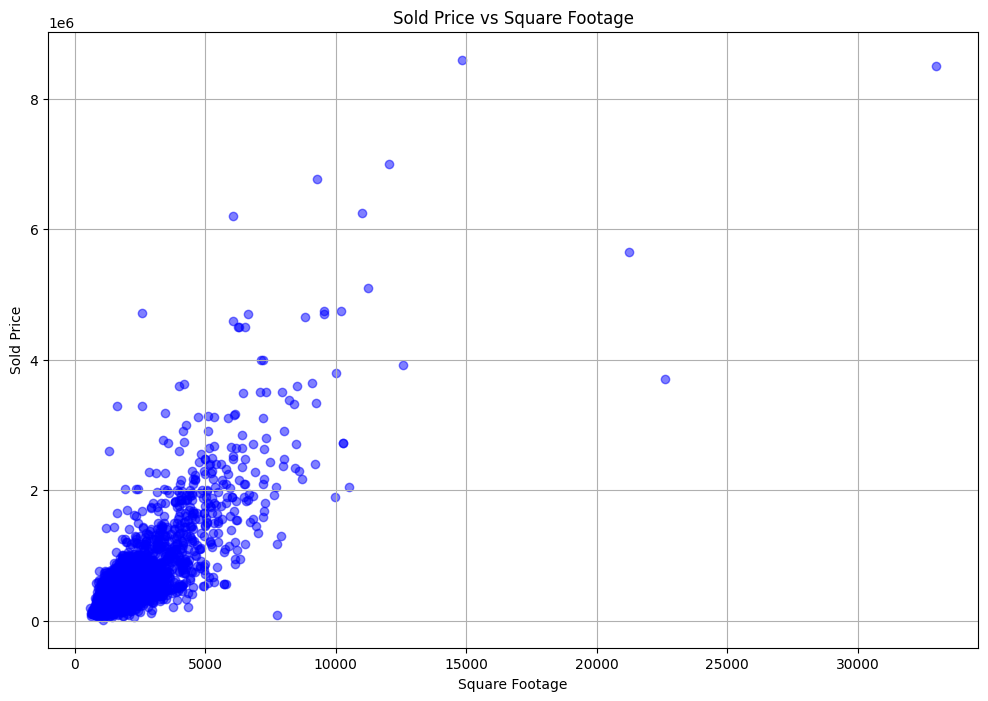

In [1291]:
plt.figure(figsize=(12, 8))
plt.scatter(ATL_RE_Data['Square Footage'], ATL_RE_Data['Sold Price'], alpha=0.5, color='blue')
plt.title('Sold Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sold Price')
plt.grid(True)
plt.show()






In [1292]:
# Calculate statistics
min_price = ATL_RE_Data['Sold Price'].min()
max_price = ATL_RE_Data['Sold Price'].max()
median_price = ATL_RE_Data['Sold Price'].median()

print(f"Minimum Sold Price: ${min_price:,.2f}")
print(f"Maximum Sold Price: ${max_price:,.2f}")
print(f"Median Sold Price: ${median_price:,.2f}")


Minimum Sold Price: $12,750.00
Maximum Sold Price: $8,600,000.00
Median Sold Price: $476,000.00


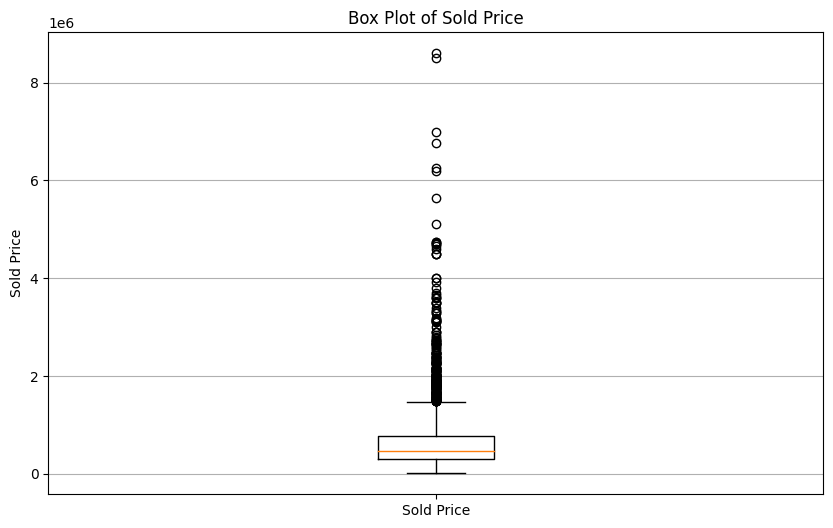

In [1293]:
import matplotlib.pyplot as plt

# Creating a box plot for the 'Sold Price' column
plt.figure(figsize=(10, 6))
plt.boxplot(ATL_RE_Data['Sold Price'])
plt.title('Box Plot of Sold Price')
plt.ylabel('Sold Price')
plt.xticks([1], ['Sold Price'])
plt.grid(axis='y')
plt.show()


In [1295]:
# Recompute z-scores for 'Sold Price'
z_scores = (ATL_RE_Data["Sold Price"] - ATL_RE_Data["Sold Price"].mean()) / ATL_RE_Data["Sold Price"].std()

# Identify potential outliers (using a threshold of 3)
outliers = np.where(np.abs(z_scores) > 3)[0]

# Calculate the number of potential outliers
num_outliers = len(outliers)

num_outliers, outliers





(49,
 array([  44,   79,  104,  276,  412,  451,  530,  581,  622,  630,  636,
         668,  671,  675,  679,  740,  755,  759,  805,  888,  900,  986,
        1010, 1025, 1107, 1136, 1159, 1182, 1296, 1303, 1324, 1381, 1403,
        1488, 1499, 1542, 1564, 1575, 1576, 1586, 1911, 1915, 1926, 1992,
        1995, 2089, 2101, 2339, 2440]))

In [1296]:
# Recompute z-scores for 'Sold Price'
z_scores = (ATL_RE_Data["Sold Price"] - ATL_RE_Data["Sold Price"].mean()) / ATL_RE_Data["Sold Price"].std()

# Identify potential outliers (using a threshold of 3)
outliers = ATL_RE_Data.index[np.abs(z_scores) > 3].tolist()

# Remove the rows corresponding to the outliers
ATL_RE_Data_SF_cleaned = ATL_RE_Data.drop(index=outliers)

# Verify the cleaned data
print(ATL_RE_Data_SF_cleaned.sort_values(by='Sold Price').head())


      Square Footage  lot sqft  Bedrooms  Bathrooms  Stories  Sold Price  \
3654          1080.0   13068.0       3.0        1.0      1.0     12750.0   
2112           912.0   39988.0       2.0        1.0      1.0     51000.0   
4428          1431.0   17556.0       3.0        1.0      1.0     55000.0   
4316          2283.0   10030.0       4.0        1.0      1.0     60000.0   
1304          1121.0    8712.0       3.0        1.0      1.0     60000.0   

      Sold Date Postal Code  House Age  
3654 2023-04-14       30317       72.0  
2112 2023-05-31       30331       73.0  
4428 2023-03-23       30315       69.0  
4316 2023-03-28       30349       51.0  
1304 2023-06-28       30316       76.0  


In [1297]:
import pandas as pd

# 1. Compute the z-scores for ATL_RE_Data_SF_cleaned based on its own mean and standard deviation.
z_scores_cleaned_on_cleaned = (ATL_RE_Data_SF_cleaned["Sold Price"] - ATL_RE_Data_SF_cleaned["Sold Price"].mean()) / ATL_RE_Data_SF_cleaned["Sold Price"].std()

# 2. Compute the z-scores for ATL_RE_Data_SF_cleaned based on the mean and standard deviation of the original ATL_RE_Data_SF.
z_scores_cleaned_on_original = (ATL_RE_Data_SF_cleaned["Sold Price"] - ATL_RE_Data_SF["Sold Price"].mean()) / ATL_RE_Data_SF["Sold Price"].std()

# Checking the first few values for both z-scores
print(z_scores_cleaned_on_cleaned.head())
print(z_scores_cleaned_on_original.head())

# Check for any z-scores above 3 or below -3 for the cleaned dataset based on its own stats
outliers_cleaned_on_cleaned = z_scores_cleaned_on_cleaned[np.abs(z_scores_cleaned_on_cleaned) > 3]

# Check for any z-scores above 3 or below -3 for the cleaned dataset based on the original dataset's stats
outliers_cleaned_on_original = z_scores_cleaned_on_original[np.abs(z_scores_cleaned_on_original) > 3]

print("\nOutliers based on cleaned dataset's stats:\n", outliers_cleaned_on_cleaned)
print("\nOutliers based on original dataset's stats:\n", outliers_cleaned_on_original)




0   -0.973806
1   -0.861523
2   -0.886226
4   -0.385854
5    1.659730
Name: Sold Price, dtype: float64
0   -0.746928
1   -0.672506
2   -0.688879
4   -0.357226
5    0.998612
Name: Sold Price, dtype: float64

Outliers based on cleaned dataset's stats:
 44      3.639985
76      3.331719
169     3.895173
322     3.537910
632     3.027535
          ...   
5049    4.303473
5151    4.048286
5291    3.793098
5487    4.176900
5713    3.691023
Name: Sold Price, Length: 63, dtype: float64

Outliers based on original dataset's stats:
 Series([], Name: Sold Price, dtype: float64)
